In [237]:
%autosave 160
%matplotlib inline
from matplotlib import style
#style.use('fivethirtyeight')
style.use('seaborn')
import matplotlib.pyplot as plt

Autosaving every 160 seconds


In [238]:
import numpy as np
import pandas as pd
import pprint

In [239]:
import datetime as dt
import timedelta

# Reflect Tables into SQLAlchemy ORM

In [240]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [241]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [215]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [216]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [217]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [218]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [219]:
#VIEW measurement table columns
Measurement.__table__.columns.keys()

['id', 'station', 'date', 'prcp', 'tobs']

In [220]:
#view measurement table data to get idea of data
session.execute('SELECT * FROM Measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [221]:
# view station table columns
Station.__table__.columns.keys()

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

In [222]:
#view station table data
session.execute('SELECT * FROM Station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Climate Analysis

In [223]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from today
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
#print(last_date)

py_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(py_date)

2016-08-23


In [224]:
#session.execute("Select * from sqlite limit 10").fetchall()

# Perform a query to retrieve the data and precipitation scores

        
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip_qry)
precip_df.head(20)
# Sort the dataframe by date




,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
5,2016-08-24,2.15
6,2016-08-24,1.45
7,2016-08-25,0.08
8,2016-08-25,0.08
9,2016-08-25,0.00


In [225]:
precip_df.set_index('date')

precip_df['date']= pd.to_datetime(precip_df.date)

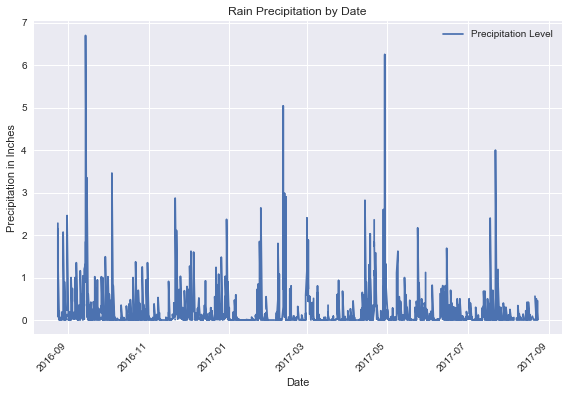

<Figure size 5400x3960 with 0 Axes>

In [226]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot('date','prcp')
plt.xlabel('Date')
plt.ylabel('Precipitation in Inches')
plt.title('Rain Precipitation by Date')
plt.tight_layout()
plt.legend(["Precipitation Level"])

# Rotate the xticks for the dates
plt.xticks(rotation=45)
plt.figure(figsize=(75,55))
plt.show()

In [227]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [228]:
# How many stations are available in this dataset?
stat_qry= session.query(Station.station).count()

print(f'There are {stat_qry} stations within this data query')
        

There are 9 stations within this data query


In [229]:
# What are the most active stations?
# List the stations and the counts in descending order.
active_qry= session.query(Measurement.station, func.count(Measurement.tobs)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.tobs).desc()).all()
                          
pprint.pprint(active_qry)

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]


In [230]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
stat_temp = active_qry [0][0]
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                filter(Measurement.station == stat_temp).all()

[(54.0, 85.0, 71.66378066378067)]

In [231]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obs = session.query(Measurement.station, Measurement.tobs).\
                filter(Measurement.station == stat_temp).\
                filter(Measurement.date >= py_date).all()
temp_df = pd.DataFrame(temp_obs)
temp_df.set_index('station', inplace=True)
temp_df.head()

,tobs
station,
USC00519281,77.0
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0


<function matplotlib.pyplot.show(*args, **kw)>

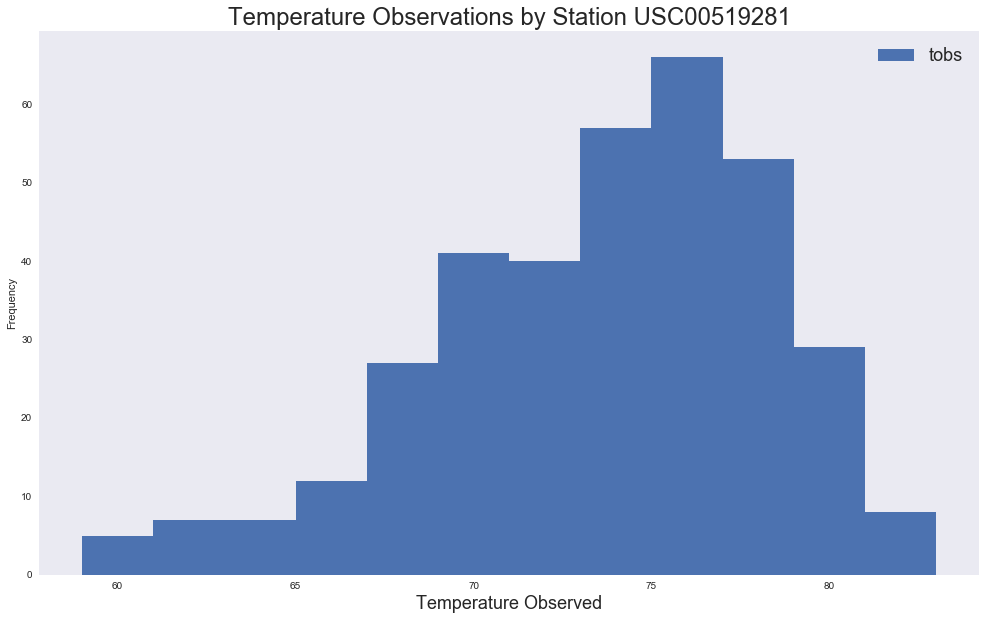

In [232]:
temp_df.plot.hist(by='station', bins=12, figsize=(15,10))
plt.grid()
plt.title("Temperature Observations by Station " + stat_temp, fontsize=24)
plt.xlabel("Temperature Observed", fontsize=18)
plt.legend(bbox_to_anchor=(1,1), fontsize=18)
plt.show


In [233]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2016-01-01', '2016-08-23'))

[(56.0, 73.49224544841537, 83.0)]


In [234]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
tripdata = calc_temps('2016-01-02', '2016-01-09')
tripdata

[(62.0, 70.66666666666667, 78.0)]

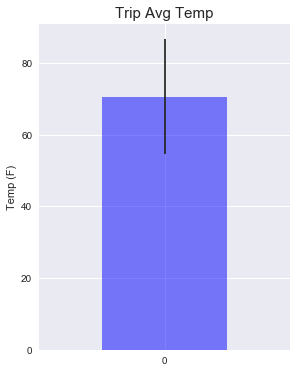

In [235]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
vacay_df = pd.DataFrame(tripdata, columns=['Min Temp', 'Avg Temp', 'Max Temp'])
avg_temp = vacay_df['Avg Temp']
plt.title("Trip Avg Temp", fontsize= 15)
min_max_temp = vacay_df.iloc[0]['Max Temp'] - vacay_df.iloc[0]['Min Temp']
plt.ylabel("Temp (F)")
plt.xticks([])
plt.grid()
avg_temp.plot(kind='bar', yerr=min_max_temp, figsize=(4,6), alpha=0.5, color='blue')

plt.show()

In [236]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
trip_sd = "2016-01-02"
trip_ed = "2016-01-09"


rainquery = session.query(Station.station,
                  func.sum(Measurement.prcp),
                  Station.name,
                  Station.elevation,                                    
                  Station.latitude,
                  Station.longitude)\
    .filter(Measurement.station == Station.station)\
    .filter(Measurement.date >= trip_sd)\
    .filter(Measurement.date <= trip_ed)\
    .group_by(Station.station)\
    .order_by(func.sum(Measurement.prcp).desc()).all()

pprint.pprint(rainquery)

[('USC00516128',
  2.9400000000000004,
  'MANOA LYON ARBO 785.2, HI US',
  152.4,
  21.3331,
  -157.8025),
 ('USC00519281',
  0.95,
  'WAIHEE 837.5, HI US',
  32.9,
  21.45167,
  -157.84888999999998),
 ('USC00513117', 0.54, 'KANEOHE 838.1, HI US', 14.6, 21.4234, -157.8015),
 ('USC00514830',
  0.22000000000000003,
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  7.0,
  21.5213,
  -157.8374),
 ('USC00519397', 0.22, 'WAIKIKI 717.2, HI US', 3.0, 21.2716, -157.8168),
 ('USC00519523',
  0.13,
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  19.5,
  21.33556,
  -157.71139),
 ('USC00517948', None, 'PEARL CITY, HI US', 11.9, 21.3934, -157.9751)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


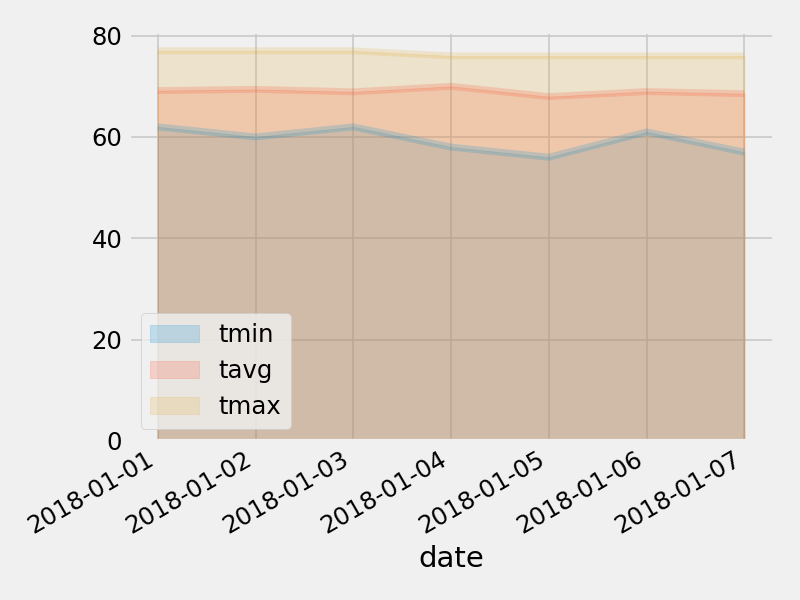

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
